In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
aaa = np.load("./on_policy.npy")
print aaa
print np.mean(aaa[0:30])
print np.std(aaa)


[-0.26850575 -0.26649138 -0.26352337 -0.2643248  -0.26522318 -0.2665035
 -0.26577583 -0.26356268 -0.26927346 -0.26528248 -0.26882738 -0.26802874
 -0.264427   -0.2666786  -0.2662705  -0.26617116 -0.26482597 -0.26790142
 -0.26843172 -0.26268646 -0.25849554 -0.26357177 -0.26708186 -0.26462567
 -0.2656004  -0.26595303 -0.2665956  -0.26508704 -0.26308566 -0.26446462
 -0.26732814 -0.26506874 -0.2700253  -0.26289365 -0.26656893 -0.26431215
 -0.26915896 -0.26486018 -0.26758286 -0.27192986 -0.2732777  -0.26794136
 -0.26399654 -0.26566282 -0.26353678 -0.26958624 -0.26375043 -0.2646491
 -0.26569262 -0.26372838 -0.26547304 -0.26488996 -0.2670641  -0.26408607
 -0.26735044 -0.265803   -0.26524684 -0.26497835 -0.26146528 -0.2635914
 -0.264028   -0.26595625 -0.2656903  -0.26214296 -0.2643166  -0.26381567
 -0.26229692 -0.2671105  -0.26746964 -0.26030248 -0.26704538 -0.26714805
 -0.26920897 -0.26343042 -0.26655868 -0.2599454  -0.26437166  0.
  0.          0.          0.          0.          0.          

In [2]:

para = 10
mse_list = np.zeros([4,para,15])
true = -0.26557
n_list = [50000,100000,200000,400000]


for k in range(4):
    n = n_list[k]
    for j in range(8):
        aaa = np.load("./ver="+str(j+1)+"nt=1ts="+str(n)+"gm=0.98.npy")
        for i in range(15):
            mse_list[k,j,i] = np.mean((true-aaa[i,:])*(true-aaa[i,:]))
        
all_list = np.log10(np.mean(mse_list,1)) 
print all_list

[[-1.21851794 -3.29614211 -1.24855193 -1.24855193 -0.95442414 -0.77825569
  -1.24855193 -1.24855193 -2.23834234 -2.23834656 -2.05639598 -2.23291355
  -0.69755277 -0.74285266 -2.23834955]
 [-1.21851794 -3.60274232 -1.24855193 -1.24855193 -0.95442414 -0.74797612
  -1.24855193 -1.24855193 -2.93935938 -2.93936366 -2.57572015 -2.93537548
  -0.68122324 -0.74972941 -2.93936588]
 [-1.21851794 -3.91732131 -1.24855193 -1.24855193 -0.95442414 -0.7715866
  -1.24855193 -1.24855193 -3.67461361 -3.67461678 -2.99039966 -3.65960172
  -0.72812264 -0.72700405 -3.67461704]
 [-1.21851794 -4.17911042 -1.24855193 -1.24855193 -0.95442414 -0.88931001
  -1.24855193 -1.24855193 -4.26771459 -4.26771456 -3.21691    -4.25129478
  -0.87965074 -0.76064289 -4.26771181]]


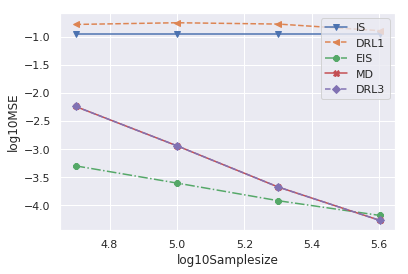

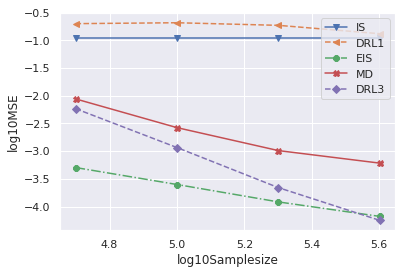

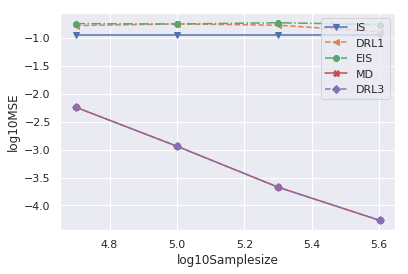

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

x_list = np.log10(n_list)
plt.plot(x_list,all_list[:,4],label="IS", ls='-' ,marker="v")
plt.plot(x_list,all_list[:,5],label="DRL1",ls='--',marker="<")
plt.plot(x_list,all_list[:,1],label="EIS",ls='-.',marker="8")
plt.plot(x_list,all_list[:,8],label="MD",ls='-' ,marker="X")
plt.plot(x_list,all_list[:,9],label="DRL3",ls='--' ,marker="D")
plt.ylabel("log10MSE")
plt.xlabel("log10Samplesize")
plt.legend(loc='upper right')
plt.savefig("6_1.png")
plt.show()
plt.plot(x_list,all_list[:,4],label="IS", ls='-' ,marker="v")
plt.plot(x_list,all_list[:,12],label="DRL1",ls='--',marker="<")
plt.plot(x_list,all_list[:,1],label="EIS",ls='-.',marker="8")
plt.plot(x_list,all_list[:,10],label="MD",ls='-' ,marker="X")
plt.plot(x_list,all_list[:,11],label="DRL3",ls='--' ,marker="D")
plt.ylabel("log10MSE")
plt.xlabel("log10Samplesize")
plt.legend(loc='upper right')
plt.savefig("6_2.png")
plt.show()
plt.plot(x_list,all_list[:,4],label="IS", ls='-' ,marker="v")
plt.plot(x_list,all_list[:,5],label="DRL1",ls='--',marker="<")
plt.plot(x_list,all_list[:,13],label="EIS",ls='-.',marker="8")
plt.plot(x_list,all_list[:,8],label="MD",ls='-' ,marker="X")
plt.plot(x_list,all_list[:,14],label="DRL3",ls='--' ,marker="D")
plt.ylabel("log10MSE")
plt.xlabel("log10Samplesize")
plt.legend(loc='upper right')
plt.savefig("6_3.png")
plt.show()

In [74]:
print np.mean(aaa,1)

[-0.26096153 -0.26541534 -0.4167824   0.         -0.3294992  -0.46851182
 -0.35607246 -0.2607558  -0.2607558  -0.2408966  -0.26134273 -0.6015305
 -0.2607558 ]


In [247]:
def quadratic_solver(n, M, bbb , regularizer=0.001):
        qp_G = np.matmul(M, M.T)
        qp_G += regularizer * np.eye(n)

        qp_a = np.matmul(M, bbb)###np.zeros(n, dtype = np.float64)

        qp_C = np.zeros((n,n+1), dtype = np.float64)
        for i in range(n):
                qp_C[i,0] = 1.0
                qp_C[i,i+1] = 1.0
        qp_b = np.zeros(n+1, dtype = np.float64)
        qp_b[0] = 1.0
        print np.matmul(qp_C,qp_b)
        meq = 1
        res = quadprog.solve_qp(qp_G, qp_a, qp_C, qp_b, meq)
        print res
        w = res[0]
        return w

In [205]:
n =2000

x = quadratic_solver(n,aaa/10000.0,bbb/10000.0)



###print np.matmul(aaa.T, bbb).shape

[1. 1. 1. ... 1. 1. 1.]
(array([-6.21509014e-14, -8.37298053e-17, -2.42096139e-16, ...,
       -2.83945878e-16,  2.82110501e-16, -8.79625826e-17]), -55.891618488007815, array([  0.        , -10.75614919, -14.47505052, ...,  -5.11258458,
        -6.10567072, -49.05271871]), array([2186,  192], dtype=int32), array([-42.24966763,  42.24966763,  40.30686746, ...,  38.36317041,
        54.38261746,  40.85835583]), array([   1, 1683,  355, ..., 1053, 1275,  925], dtype=int32))


In [45]:
import quadprog

In [274]:
print x

[-6.21509014e-14 -8.37298053e-17 -2.42096139e-16 ... -2.83945878e-16
  2.82110501e-16 -8.79625826e-17]


(array([1106.,  307.,  190.,  107.,    0.,  139.,    0.,    0.,    0.,
         151.]),
 array([    0.        ,  3200.        ,  6399.99999999,  9599.99999999,
        12799.99999998, 15999.99999998, 19199.99999998, 22399.99999997,
        25599.99999997, 28799.99999996, 31999.99999996]),
 <a list of 10 Patch objects>)

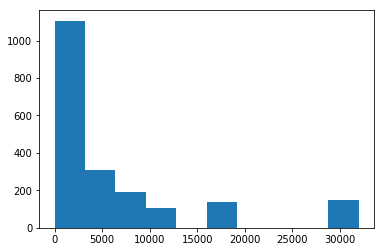

In [273]:
plt.hist(bbb)

In [144]:
aaa = np.ones([2])
bbb = np.zeros([2,2])
bbb[1,1] =4.0
###print bbb
print aaa
print quadratic_solver(2,bbb,aaa)

[1. 1.]
[1. 1.]
(array([0.74996875, 0.25003125]), -0.4996875078115235, array([0.        , 0.24998438]), array([2, 0], dtype=int32), array([0.00074997, 0.        , 0.        ]), array([1], dtype=int32))
[0.74996875 0.25003125]


In [283]:
aaa = np.load("../confirm_initial.py")

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [38]:
aaa = np.load("../initial.npz.npy")
print aaa[:,0,0]

count = np.zeros(2000)
for i in aaa:
    count[i] +=1
count = count/np.sum(count)

np.save("emp_hist",count)

[1619   64  104 ... 1459  854 1029]
